In [1]:
# setup
import pandas as pd
import os
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

import MyFunctions as f

In [2]:
# empty dataset to store the resutls
resultsSVM = pd.DataFrame(columns=["model_id", "cost", "f1_score", "presicion", "recall"])

In [3]:
# import pre-processed test ser
test = pd.read_csv("data/test_set_preprocessed.csv")
y_test = test["class"].values
X_test = test.drop("class", axis=1)

In [4]:
# parameters grid
parameters_grid = {"kernel": ["poly", "rbf"]}

Sampling Technique: Random Over-Sampler
Classification algorithm: SVM
Scoring: roc_auc
Best parameters set found on development set:
{'kernel': 'rbf'}

Model evaluation

Total cost: 90250

F1 score 0.446
Precision:  0.382
Recall 0.536

False positives:  325
False negatives:  174

Confusion matrix, without normalization


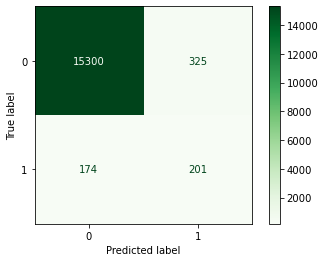

     Normalized confusion matrix


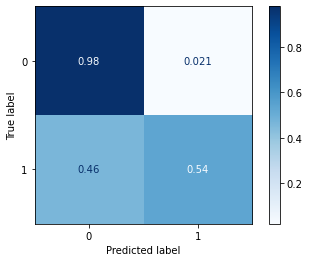

Sampling Technique: SMOTE and cleaning using ENN
Classification algorithm: SVM
Scoring: roc_auc
Best parameters set found on development set:
{'kernel': 'rbf'}

Model evaluation

Total cost: 89120

F1 score 0.413
Precision:  0.332
Recall 0.547

False positives:  412
False negatives:  170

Confusion matrix, without normalization


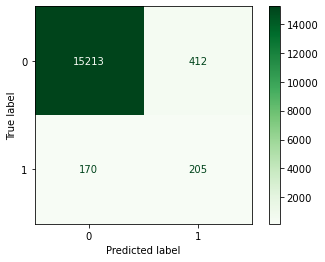

     Normalized confusion matrix


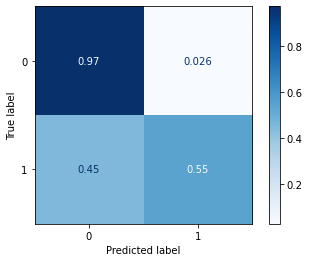

Sampling Technique: SMOTE and cleaning using Tomek links
Classification algorithm: SVM
Scoring: roc_auc
Best parameters set found on development set:
{'kernel': 'rbf'}

Model evaluation

Total cost: 90390

F1 score 0.439
Precision:  0.372
Recall 0.536

False positives:  339
False negatives:  174

Confusion matrix, without normalization


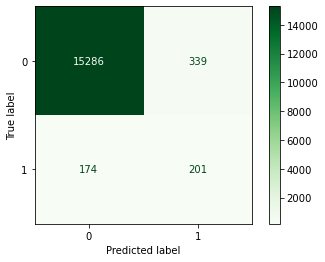

     Normalized confusion matrix


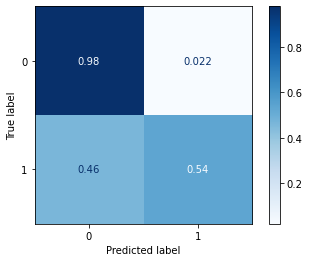

Sampling Technique: SMOTE
Classification algorithm: SVM
Scoring: roc_auc
Best parameters set found on development set:
{'kernel': 'rbf'}

Model evaluation

Total cost: 90280

F1 score 0.445
Precision:  0.38
Recall 0.536

False positives:  328
False negatives:  174

Confusion matrix, without normalization


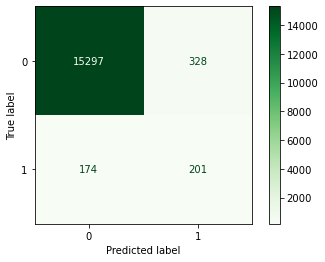

     Normalized confusion matrix


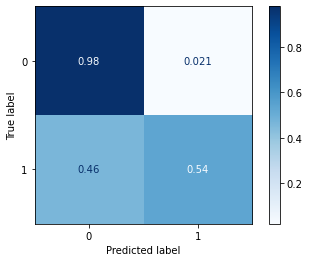

In [5]:
# train with all sample tecniques, grid search, score: "roc_auc"
for element in os.listdir("train_after_resample"):
    
    model_id = "SVM_"+element[0:-4]+"_roc_auc"

    print("\033[1m"+"Sampling Technique:"+"\033[0m", element[0:-4])
    print("\033[1m"+"Classification algorithm:"+"\033[0m", "SVM")
    print("\033[1m"+"Scoring:"+"\033[0m", "roc_auc")
    
    # import the smapled training set
    sampled_train = pd.read_csv("train_after_resample/"+element)
    y_sam_train = sampled_train["class"].values
    X_sam_train = sampled_train.drop("class", axis=1)
    
    # set classifier
    svm =  SVC(class_weight = "balanced")
    clf = GridSearchCV(estimator=svm, param_grid=parameters_grid, scoring="roc_auc", n_jobs=-1, refit=True, error_score=0)
    
    # fit
    clf.fit(X_sam_train, y_sam_train)
    
    # predict
    y_pred = clf.predict(X_test)
    
    # show best parameters (used in final training)
    print("Best parameters set found on development set:")
    print(clf.best_params_)
    print()
    
    # evaluate
    print("\033[1m"+"Model evaluation"+"\033[0m")
    print()
    cost, f1s, pres, recall = f.evaluation_metrics(y_pred, y_test, X_test, clf, 10, 500, model_id)
    
    # save evaluation metrics in dataframe
    new_row = {"model_id": model_id, "cost": cost, "f1_score": f1s, "presicion": pres, "recall":recall}
    resultsSVM = resultsSVM.append(new_row, ignore_index=True)

In [6]:
resultsSVM.head()

,model_id,cost,f1_score,presicion,recall
0,SVM_Random Over-Sampler_roc_auc,90250,0.446171,0.382129,0.536000
1,SVM_SMOTE and cleaning using ENN_roc_auc,89120,0.413306,0.332253,0.546667
2,SVM_SMOTE and cleaning using Tomek links_roc_auc,90390,0.439344,0.372222,0.536000
3,SVM_SMOTE_roc_auc,90280,0.444690,0.379962,0.536000


In [7]:
resultsSVM.to_csv("results/SVM.csv", index=False) 